In [1]:
# initial setup
%run "../../../common/0_notebooks_base_setup.py"


/Users/csuarezgurruchaga/Desktop/Digital-House/CLASE_39/dsad_2021/common
default checking
Running command `conda list`... ok
jupyterlab=2.2.6 already installed
pandas=1.1.5 already installed
bokeh=2.2.3 already installed
seaborn=0.11.0 already installed
matplotlib=3.3.2 already installed
ipywidgets=7.5.1 already installed
pytest=6.2.1 already installed
chardet=4.0.0 already installed
psutil=5.7.2 already installed
scipy=1.5.2 already installed
statsmodels=0.12.1 already installed
scikit-learn=0.23.2 already installed
xlrd=2.0.1 already installed
Running command `conda install --yes nltk=3.5.0`... ok
Solving environment: ...working... done

# All requested packages already installed.


unidecode=1.1.1 already installed
pydotplus=2.0.2 already installed
pandas-datareader=0.9.0 already installed
flask=1.1.2 already installed


---

<img src='../../../common/logo_DH.png' align='left' width=35%/>


## Dataset

**Introducción**

La Organización Mundial de la Salud ha estimado que 12 millones de muertes ocurren en todo el mundo, cada año debido a enfermedades del corazón. La mitad de las muertes en los Estados Unidos y otros países desarrollados se deben a enfermedades cardiovasculares. El pronóstico temprano de las enfermedades cardiovasculares puede ayudar a tomar decisiones sobre los cambios en el estilo de vida en pacientes de alto riesgo y, a su vez, reducir las complicaciones. Esta investigación tiene la intención de identificar los factores más relevantes / de riesgo de enfermedad cardíaca, así como predecir el riesgo general mediante distintos modelos de clasificación

**Fuente**

El conjunto de datos está disponible públicamente en el sitio web de Kaggle (https://www.kaggle.com/amanajmera1/framingham-heart-study-dataset), y proviene de un estudio cardiovascular en curso en residentes de la ciudad de Framingham, Massachusetts. El objetivo de la clasificación es predecir si el paciente tiene riesgo de enfermedad coronaria (CHD) en los próximos 10 años. El conjunto de datos proporciona la información del paciente. Incluye más de 4000 registros y 15 atributos.

**Variables**

Cada atributo es un factor de riesgo potencial. Hay factores de riesgo demográficos, conductuales y médicos.

Demográficos:

• Sex: male or female(Nominal)

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
Behavioral

• Current Smoker: whether or not the patient is a current smoker (Nominal)

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

Médicos (histórico):

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)

Médicos (actual):

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)

Variable a predecir (target):

• 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)



## Ejercicios

En esta clase vamos entrenar distintos modelos de clasificación usando:
    
* Regresión Logística    

* KNN

* Classification Tree

* Random Forest


Para cada uno de ello vamos a evaluar la preformance en testing del modelo resultado

* Default

* Grid Search Cross Validation KFold

* Grid Search CV Stratified KFold

* Bagging

* Bagging Grid Search Cross Validation

Las métricas que vamos a calcular para cada modelo son

* score

* confusion matrix




## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import auc, plot_roc_curve


## Ejercicio 1

1.1) Leamos los datos del archivo datasets_222487_478477_framingham.csv

1.2) ¿Qué porcentaje de registros hay en cada una de las categorías target?

1.3) ¿El dataset tiene datos faltantes?

1.4) Usemos `dropna` para eliminar los registros con valores faltantes, y volvamos a calcular el porcentaje de registros hay en cada una de las categorías target 

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html


In [3]:
data_raw = pd.read_csv('../Data/datasets_222487_478477_framingham.csv')
data_raw.shape

(4238, 16)

In [4]:
data_raw.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

Veamos qué procentaje de registros hay en cada una de las categorías target

In [5]:
data_raw.TenYearCHD.value_counts() / data_raw.shape[0]

0    0.848042
1    0.151958
Name: TenYearCHD, dtype: float64

In [6]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [7]:
data = data_raw.dropna()
data.shape

(3656, 16)

In [8]:
data.TenYearCHD.value_counts() / data.shape[0]

0    0.847648
1    0.152352
Name: TenYearCHD, dtype: float64

Vemos que en este caso, eliminando los registros que tienen algun valor nulo no cambiamos la proporción de registros en cada una de las categorías target

In [9]:
data.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [10]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## Ejercicio 2 - Train Test Split + StandardScaler

Construir los conjuntos de entranamiento y test y usando StandardScaler normalizar las features

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [11]:
X=data.drop(["TenYearCHD"],axis=1)
y=data["TenYearCHD"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=717)

In [12]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

## De la práctica de checkpoint:

Vamos a usar esta función para entrenar todos los modelos que pide el enunciado, devolviendo como resultado las métricas de evaluación de cada modelo.

In [13]:
def evaluate_model(model_instance, X_train, y_train, X_test, y_test, gridSearch_params, gridSearch_bagging_params):
    
    # entreno el modelo default
    model_instance.fit(X_train, y_train)
    
    # calculo el score sobre los datos de test
    score_default_test = model_instance.score(X_test, y_test)
    
    # calculo la matriz de confusión
    predictions_default = model_instance.predict(X_test)
    confusion_matrix_default = metrics.confusion_matrix(y_test, predictions_default)
    
    ###################################################
    
    # gridSearch KFold:    
    cv_KFold = KFold(n_splits=3, shuffle=True, random_state=371)
    grid_search_CV_KFold_model = GridSearchCV(model_instance, gridSearch_params, n_jobs=-1, cv = cv_KFold)    
    grid_search_CV_KFold_model.fit(X_train, y_train)        
    scores_KFold = cross_val_score(model_instance, X_train, y_train, cv=cv_KFold, n_jobs=-1)
    mean_score_grid_search_CV_KFold_model = scores_KFold.mean()
    std_score_grid_search_CV_KFold_model = scores_KFold.std()
        
    score_grid_search_CV_KFold_model = grid_search_CV_KFold_model.best_score_
    params_grid_search_CV_KFold_model = grid_search_CV_KFold_model.best_params_
    
    score_grid_search_CV_KFold_model_test = grid_search_CV_KFold_model.score(X_test, y_test)
    predictions_grid_search_CV_KFold_model = grid_search_CV_KFold_model.predict(X_test)    
    confusion_matrix_grid_search_CV_KFold_model = metrics.confusion_matrix(y_test, predictions_grid_search_CV_KFold_model)

    ###################################################
    
    # gridSearch Stratified KFold:    
    cv_Stratified_KFold = StratifiedKFold(n_splits=3, shuffle=True, random_state=371)
    grid_search_CV_Stratified_KFold_model = GridSearchCV(model_instance, gridSearch_params, n_jobs=-1, cv = cv_Stratified_KFold)    
    grid_search_CV_Stratified_KFold_model.fit(X_train, y_train)        
    scores_Stratified_KFold = cross_val_score(model_instance, X_train, y_train, cv=cv_Stratified_KFold, n_jobs=-1)
    mean_score_grid_search_CV_Stratified_KFold_model = scores_Stratified_KFold.mean()
    std_score_grid_search_CV_Stratified_KFold_model = scores_Stratified_KFold.std()    
    
    score_grid_search_CV_Stratified_KFold_model = grid_search_CV_Stratified_KFold_model.best_score_
    params_grid_search_CV_Stratified_KFold_model = grid_search_CV_Stratified_KFold_model.best_params_
    
    score_grid_search_CV_Stratified_KFold_model_test = grid_search_CV_Stratified_KFold_model.score(X_test, y_test)
    predictions_grid_search_CV_Stratified_KFold_model = grid_search_CV_Stratified_KFold_model.predict(X_test)
    confusion_matrix_grid_search_CV_Stratified_KFold_model = metrics.confusion_matrix(y_test, predictions_grid_search_CV_Stratified_KFold_model)

    ###################################################
    
    if gridSearch_bagging_params:

        # bagging

        bagging_model_default = BaggingClassifier(base_estimator = model_instance)
        bagging_model_default.fit(X_train, y_train)
        score_bagging_model_default_test =  bagging_model_default.score(X_test, y_test)
        
        predictions_bagging_model_default = bagging_model_default.predict(X_test)
        confusion_matrix_bagging_model_default = metrics.confusion_matrix(y_test, predictions_bagging_model_default)    

        ###################################################

        # bagging Stratified KFold cross validation usando de base el mejor modelo de gridsearch estratificado
        base_estimator_stratified_grid_search = grid_search_CV_Stratified_KFold_model.best_estimator_
        cv_Stratified_KFold =StratifiedKFold(n_splits=3, shuffle=True, random_state=371)
        grid_search_bagging_model = GridSearchCV(BaggingClassifier(base_estimator = base_estimator_stratified_grid_search),
                               gridSearch_bagging_params, n_jobs=-1, cv = cv_Stratified_KFold)

        grid_search_bagging_model.fit(X_train, y_train)
        
        score_grid_search_bagging_model_test = grid_search_bagging_model.score(X_test, y_test)
        predictions_grid_search_bagging_model = grid_search_bagging_model.predict(X_test)
        confusion_matrix_grid_search_bagging_model = metrics.confusion_matrix(y_test, predictions_grid_search_bagging_model)
        scores_bagging_Stratified_KFold = cross_val_score(BaggingClassifier(base_estimator = base_estimator_stratified_grid_search),
                                                          X_train, y_train, cv=cv_Stratified_KFold, n_jobs=-1)
        mean_score_bagging_grid_search_CV_Stratified_KFold_model = scores_bagging_Stratified_KFold.mean()
        std_score_bagging_grid_search_CV_Stratified_KFold_model = scores_bagging_Stratified_KFold.std()    
        
        best_score_bagging_grid_search_CV_Stratified_KFold_model = grid_search_bagging_model.best_score_
        best_params_bagging_grid_search_CV_Stratified_KFold_model = grid_search_bagging_model.best_params_
    
    else:
        
        score_bagging_model_default_test = None
        confusion_matrix_bagging_model_default = None
        mean_score_bagging_grid_search_CV_Stratified_KFold_model = None
        std_score_bagging_grid_search_CV_Stratified_KFold_model = None
        confusion_matrix_grid_search_bagging_model = None
        best_score_bagging_grid_search_CV_Stratified_KFold_model = None
        score_grid_search_bagging_model_test = None
        best_params_bagging_grid_search_CV_Stratified_KFold_model = None

                                                                                                                                     
    ###################################################
    
    
    # armo un diccionario con todos los valores de performance que calculé para los modelos
    result = {
        'default': {
            'score': score_default_test,
            'confusion_matrix': confusion_matrix_default            
        },
        'cv_kfold': {
            'mean_score_grid_search': mean_score_grid_search_CV_KFold_model,
            'std_score_grid_search': std_score_grid_search_CV_KFold_model,
            'best_score_grid_search': score_grid_search_CV_KFold_model,
            'score': score_grid_search_CV_KFold_model_test,
            'confusion_matrix': confusion_matrix_grid_search_CV_KFold_model           
        },
        'cv_stratified_kfold': {
            'mean_score_grid_search': mean_score_grid_search_CV_Stratified_KFold_model,
            'std_score_grid_search': std_score_grid_search_CV_Stratified_KFold_model,
            'best_score_grid_search': score_grid_search_CV_Stratified_KFold_model,
            'score': score_grid_search_CV_Stratified_KFold_model_test,
            'confusion_matrix': confusion_matrix_grid_search_CV_Stratified_KFold_model           
        },
        'bagging': {
            'score': score_bagging_model_default_test,
            'confusion_matrix': confusion_matrix_bagging_model_default           
        },
        'bagging_cv_stratified_kfold': {
            'mean_score_grid_search': mean_score_bagging_grid_search_CV_Stratified_KFold_model,
            'std_score_grid_search': std_score_bagging_grid_search_CV_Stratified_KFold_model,
            'best_score_grid_search': best_params_bagging_grid_search_CV_Stratified_KFold_model,
            'score': score_grid_search_bagging_model_test,
            'confusion_matrix': confusion_matrix_grid_search_bagging_model           
        }
        
    }
    
    return result
        
#           'trained_model_instance': model_instance, 
#              'score_default': score_default_test,
#              'confusion_matrix_default': confusion_matrix_default,
#              'mean_score_grid_search_CV_KFold_model': mean_score_grid_search_CV_KFold_model, 
#              'std_score_grid_search_CV_KFold_model': std_score_grid_search_CV_KFold_model, 
#              'best_score_grid_search_CV_KFold_model': score_grid_search_CV_KFold_model,
#              'best_params_grid_search_CV_KFold_model': params_grid_search_CV_KFold_model,              
#              'score_grid_search_CV_KFold_model_test': score_grid_search_CV_KFold_model_test,
#              'confusion_matrix_grid_search_CV_KFold_model': confusion_matrix_grid_search_CV_KFold_model,
        
#              'mean_score_grid_search_CV_Stratified_KFold_model': mean_score_grid_search_CV_Stratified_KFold_model, 
#              'std_score_grid_search_CV_Stratified_KFold_model': std_score_grid_search_CV_Stratified_KFold_model, 
#              'best_score_grid_search_CV_Stratified_KFold_model': score_grid_search_CV_Stratified_KFold_model,
#              'best_params_grid_search_CV_Stratified_KFold_model': params_grid_search_CV_Stratified_KFold_model,              
#              'score_grid_search_CV_Stratified_KFold_model_test': score_grid_search_CV_Stratified_KFold_model_test,
#              'confusion_matrix_grid_search_CV_Stratified_KFold_model': confusion_matrix_grid_search_CV_Stratified_KFold_model,
        
#              'score_bagging_default': score_bagging_model_default_test,
#              'confusion_matrix_bagging_default': confusion_matrix_bagging_model_default,
        
#              'mean_score_bagging_grid_search_CV_Stratified_KFold_model': mean_score_bagging_grid_search_CV_Stratified_KFold_model, 
#              'std_score_bagging_grid_search_CV__StratifiedKFold_model': std_score_bagging_grid_search_CV_Stratified_KFold_model, 
#              'best_score_bagging_grid_search_CV_Stratified_KFold_model': best_score_bagging_grid_search_CV_Stratified_KFold_model,
#              'best_params_bagging_grid_search_CV_Stratified_KFold_model': best_params_bagging_grid_search_CV_Stratified_KFold_model,              
#              'score_bagging_grid_search_CV_Stratified_KFold_model_test': score_grid_search_bagging_model_test,
#              'confusion_matrix_bagging_grid_search_CV_Stratified_KFold_model': confusion_matrix_grid_search_bagging_model,

    
    
    
    
    

## Ejercicio 3 - Regresión Logística

Usemos la función definida en el checkpoint que evalua la performance de modelos en un modelo de regresión logística usando `LogisticRegression` con los parámetros por default

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Los parámetros de GridSearchCV que vamos a probar son 

``params = {'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0], 'penalty': ['l1', 'l2']}``

Los parámetros de bagging que vamos a probar son

<code>
bagging_params = {'n_estimators': [10, 100],

                  'max_samples': [0.01, 1.0],
                  
                  'max_features': [0.3, 1.0],
                  
                  'bootstrap_features': [True, False]}
</code>



In [14]:
model_instance = LogisticRegression()
x_train = X_train_sc
x_test =  X_test_sc
gridSearch_params = {'C': [0, 1e-20, 1e-10, 1e-5, 1e-4, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0], 'penalty': ['l1', 'l2']}
gridSearch_bagging_params = {'n_estimators': [10, 100],
                  'max_samples': [0.01, 1.0],                  
                  'max_features': [0.3, 1.0],                  
                  'bootstrap_features': [True, False]}

logistic_metrics = evaluate_model(model_instance, x_train, y_train, x_test, y_test, gridSearch_params, gridSearch_bagging_params)

logistic_metrics

{'default': {'score': 0.8596171376481313,
  'confusion_matrix': array([[928,   4],
         [150,  15]])},
 'cv_kfold': {'mean_score_grid_search': 0.848378272762798,
  'std_score_grid_search': 0.01664364160925896,
  'best_score_grid_search': 0.8487690504103166,
  'score': 0.8596171376481313,
  'confusion_matrix': array([[932,   0],
         [154,  11]])},
 'cv_stratified_kfold': {'mean_score_grid_search': 0.8460336068776866,
  'std_score_grid_search': 0.0030769862735490015,
  'best_score_grid_search': 0.8499413833528721,
  'score': 0.8596171376481313,
  'confusion_matrix': array([[932,   0],
         [154,  11]])},
 'bagging': {'score': 0.8614402917046491,
  'confusion_matrix': array([[926,   6],
         [146,  19]])},
 'bagging_cv_stratified_kfold': {'mean_score_grid_search': 0.848378272762798,
  'std_score_grid_search': 0.0019925828501730007,
  'best_score_grid_search': {'bootstrap_features': False,
   'max_features': 1.0,
   'max_samples': 1.0,
   'n_estimators': 100},
  'score': 0

(Para todos los modelos vamos a ver que la capacidad de predicción de la clase minoritaria es bastante mala)

## Ejercicio 4 - KNN

Usemos la función definida en el checkpoint que evalua la performance de modelos en un modelo KNN usando `KNeighborsClassifier` con los parámetros por default (n_neighbors=5)

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Los parámetros de GridSearchCV que vamos a probar son 

``params =  {'n_neighbors': range(1,50)}``

Los parámetros de bagging que vamos a probar son

<code>
bagging_params = {'n_estimators': [10, 100],

                  'max_samples': [0.05, 1.0],
                  
                  'max_features': [0.3, 1.0],
                  
                  'bootstrap_features': [True, False]}
</code>



In [15]:
model_instance = KNeighborsClassifier()
x_train = X_train_sc
x_test =  X_test_sc
gridSearch_params = {'n_neighbors': range(1,50)}
gridSearch_bagging_params = {'n_estimators': [10, 100],
                  'max_samples': [0.05, 1.0],                  
                  'max_features': [0.3, 1.0],                  
                  'bootstrap_features': [True, False]}

knn_metrics = evaluate_model(model_instance, x_train, y_train, x_test, y_test, gridSearch_params, gridSearch_bagging_params)

knn_metrics

{'default': {'score': 0.8422971741112124,
  'confusion_matrix': array([[904,  28],
         [145,  20]])},
 'cv_kfold': {'mean_score_grid_search': 0.8237592809691286,
  'std_score_grid_search': 0.012995927431274612,
  'best_score_grid_search': 0.8468151621727237,
  'score': 0.8495897903372835,
  'confusion_matrix': array([[932,   0],
         [165,   0]])},
 'cv_stratified_kfold': {'mean_score_grid_search': 0.8284486127393512,
  'std_score_grid_search': 0.009587998551297614,
  'best_score_grid_search': 0.8479874951152794,
  'score': 0.8495897903372835,
  'confusion_matrix': array([[931,   1],
         [164,   1]])},
 'bagging': {'score': 0.8441203281677302,
  'confusion_matrix': array([[907,  25],
         [146,  19]])},
 'bagging_cv_stratified_kfold': {'mean_score_grid_search': 0.8472059398202423,
  'std_score_grid_search': 0.0014621560714239863,
  'best_score_grid_search': {'bootstrap_features': True,
   'max_features': 1.0,
   'max_samples': 1.0,
   'n_estimators': 100},
  'score': 

## Ejercicio 5 - Tree

Usemos la función definida en el checkpoint que evalua la performance de modelos en un modelo de árbol de decisión usando `DecisionTreeClassifier` con los parámetros por default

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

Los parámetros de GridSearchCV que vamos a probar son 

``params =  {'criterion': ['gini', 'entropy'],
          'splitter': ['best', 'random'],
          'max_depth': [None, 5, 10],
          'min_samples_split': [2, 5],
          'min_samples_leaf': [1, 2, 3]}``

Los parámetros de bagging que vamos a probar son

<code>
bagging_params = {'n_estimators': [10, 100],

                  'max_samples': [0.01, 1.0],
                  
                  'max_features': [0.3, 1.0],
                  
                  'bootstrap_features': [True, False]}
</code>


In [16]:
model_instance = DecisionTreeClassifier()
x_train = X_train_sc
x_test =  X_test_sc
gridSearch_params = {'criterion': ['gini', 'entropy'],
          'splitter': ['best', 'random'],
          'max_depth': [None, 5, 10],
          'min_samples_split': [2, 5],
          'min_samples_leaf': [1, 2, 3]}

gridSearch_bagging_params = {'n_estimators': [10, 100],
                  'max_samples': [0.01, 1.0],                  
                  'max_features': [0.3, 1.0],                  
                  'bootstrap_features': [True, False]}

decision_tree_metrics = evaluate_model(model_instance, x_train, y_train, x_test, y_test, gridSearch_params, gridSearch_bagging_params)

decision_tree_metrics

{'default': {'score': 0.7611668185961714,
  'confusion_matrix': array([[786, 146],
         [116,  49]])},
 'cv_kfold': {'mean_score_grid_search': 0.76357952325127,
  'std_score_grid_search': 0.017762122981420114,
  'best_score_grid_search': 0.8436889409925752,
  'score': 0.8441203281677302,
  'confusion_matrix': array([[917,  15],
         [156,   9]])},
 'cv_stratified_kfold': {'mean_score_grid_search': 0.7655334114888629,
  'std_score_grid_search': 0.009427384198370315,
  'best_score_grid_search': 0.8464243845252052,
  'score': 0.8441203281677302,
  'confusion_matrix': array([[919,  13],
         [158,   7]])},
 'bagging': {'score': 0.8432087511394712,
  'confusion_matrix': array([[906,  26],
         [146,  19]])},
 'bagging_cv_stratified_kfold': {'mean_score_grid_search': 0.8468151621727237,
  'std_score_grid_search': 0.000552643048993009,
  'best_score_grid_search': {'bootstrap_features': True,
   'max_features': 1.0,
   'max_samples': 1.0,
   'n_estimators': 10},
  'score': 0.85

## Ejercicio 6 - Random Forest

Usemos la función definida en el checkpoint que evalua la performance de modelos en un modelo random forest usando `RandomForestClassifier` con los parámetros por default

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Los parámetros de GridSearchCV que vamos a probar son 

``params =   {'n_estimators':[3, 5, 10, 50],
          'criterion': ['gini', 'entropy'],
          'max_depth': [None, 3, 5],
          'min_samples_split': [2,5],
          'class_weight':[None, 'balanced']}``

(No vamos a hacer bagging sobre este modelo porque ya es un ensamble.)

In [17]:
model_instance = RandomForestClassifier()
x_train = X_train_sc
x_test =  X_test_sc
gridSearch_params = {'n_estimators':[3, 5, 10, 50],
          'criterion': ['gini', 'entropy'],
          'max_depth': [None, 3, 5],
          'min_samples_split': [2,5],
          'class_weight':[None, 'balanced']}

gridSearch_bagging_params = None

random_forest_metrics = evaluate_model(model_instance, x_train, y_train, x_test, y_test, gridSearch_params, gridSearch_bagging_params)

random_forest_metrics

{'default': {'score': 0.8514129443938013,
  'confusion_matrix': array([[924,   8],
         [155,  10]])},
 'cv_kfold': {'mean_score_grid_search': 0.8436889409925753,
  'std_score_grid_search': 0.01471525625929092,
  'best_score_grid_search': 0.8491598280578351,
  'score': 0.8486782133090246,
  'confusion_matrix': array([[928,   4],
         [162,   3]])},
 'cv_stratified_kfold': {'mean_score_grid_search': 0.8425166080500196,
  'std_score_grid_search': 0.003868501342951011,
  'best_score_grid_search': 0.8491598280578351,
  'score': 0.8523245214220602,
  'confusion_matrix': array([[929,   3],
         [159,   6]])},
 'bagging': {'score': None, 'confusion_matrix': None},
 'bagging_cv_stratified_kfold': {'mean_score_grid_search': None,
  'std_score_grid_search': None,
  'best_score_grid_search': None,
  'score': None,
  'confusion_matrix': None}}

## Ejercicio 7 - Evaluación de modelos

Vamos a comparar los resultados de los diferentes modelos. Para eso, grafiquemos como barras los scores de los modelos evaluados en el conjunto de testing. 

¿Cuál es el ganador?

Repetir el gráfico mostrando el valor medio el desvío estandard de la validación cruzada. ¿Es el mismo ganador?


In [28]:
%matplotlib inline
all_model_metrics = [logistic_metrics, knn_metrics, decision_tree_metrics, random_forest_metrics]
all_model_names =  ['logistic', 'knn', 'decision_tree', 'random_forest']

data_to_plot = pd.DataFrame(columns = ['model', 'score'])
data_to_plot

for i in range(len(all_model_names)):
    model_name_prefix = all_model_names[i]
    model_metric = all_model_metrics[i]        
    for model_metric_key in model_metric.keys():    
        score = model_metric[model_metric_key]['score']        
        data_to_plot = data_to_plot.append({'model': model_name_prefix + '_' + model_metric_key, 'score':score}, ignore_index=True)
        
data_to_plot.index = data_to_plot.model

data_to_plot.sort_values(by = 'score', axis=0, ascending=True, inplace=True)


(0.7, 0.9)

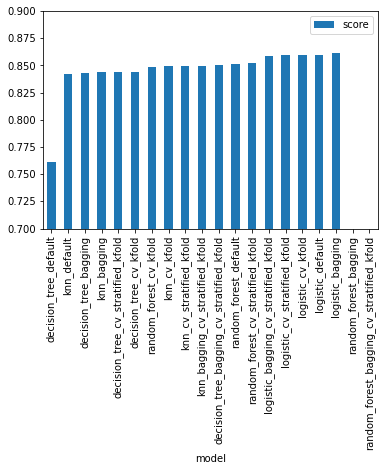

In [29]:
data_to_plot.plot(kind='bar')
plt.ylim(0.7, 0.9)


In [30]:
data_to_plot_cv = pd.DataFrame(columns = ['model', 'score', 'error'])

for i in range(len(all_model_names)):
    model_name_prefix = all_model_names[i]
    model_metric = all_model_metrics[i]        
    for model_metric_key in model_metric.keys():    
        model = model_metric[model_metric_key]
        if 'mean_score_grid_search' in model.keys() and 'std_score_grid_search' in model.keys():
            score = model['mean_score_grid_search']        
            std = model['std_score_grid_search']        
            data_to_plot_cv = data_to_plot_cv.append({'model': model_name_prefix + '_' + model_metric_key, 
                                            'score':score,
                                            'error': std,
                                           }, ignore_index=True)
        
data_to_plot_cv.index = data_to_plot_cv.model

data_to_plot_cv.sort_values(by = 'score', axis=0, ascending=True, inplace=True)

In [31]:
data_to_plot_cv

,model,score,error
model,,,
decision_tree_cv_kfold,decision_tree_cv_kfold,0.763580,0.017762
decision_tree_cv_stratified_kfold,decision_tree_cv_stratified_kfold,0.765533,0.009427
knn_cv_kfold,knn_cv_kfold,0.823759,0.012996
knn_cv_stratified_kfold,knn_cv_stratified_kfold,0.828449,0.009588
random_forest_cv_stratified_kfold,random_forest_cv_stratified_kfold,0.842517,0.003869
random_forest_cv_kfold,random_forest_cv_kfold,0.843689,0.014715
logistic_cv_stratified_kfold,logistic_cv_stratified_kfold,0.846034,0.003077
decision_tree_bagging_cv_stratified_kfold,decision_tree_bagging_cv_stratified_kfold,0.846815,0.000553
knn_bagging_cv_stratified_kfold,knn_bagging_cv_stratified_kfold,0.847206,0.001462


(0.7, 0.9)

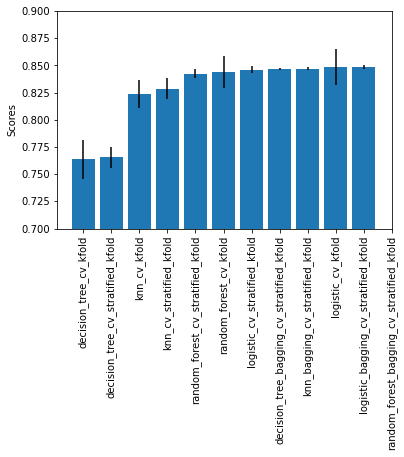

In [32]:
fig, ax = plt.subplots()
x_values = range(data_to_plot_cv.shape[0])
y_values = data_to_plot_cv.score
rects1 = ax.bar(x_values, y_values,
                yerr=data_to_plot_cv.error,
                tick_label=data_to_plot_cv.index)

ax.set_ylabel('Scores')
plt.xticks(rotation=90)
plt.ylim(0.7, 0.9)

In [33]:
y_values

model
decision_tree_cv_kfold                       0.763580
decision_tree_cv_stratified_kfold            0.765533
knn_cv_kfold                                 0.823759
knn_cv_stratified_kfold                      0.828449
random_forest_cv_stratified_kfold            0.842517
random_forest_cv_kfold                       0.843689
logistic_cv_stratified_kfold                 0.846034
decision_tree_bagging_cv_stratified_kfold    0.846815
knn_bagging_cv_stratified_kfold              0.847206
logistic_cv_kfold                            0.848378
logistic_bagging_cv_stratified_kfold         0.848378
random_forest_bagging_cv_stratified_kfold         NaN
Name: score, dtype: float64

## Ejercicio 8 - Importancia de features

Veamos ahora la cuál es la importancia de cada variable predictora en el modelo random forest

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_

Representemos en un gráfico de barras la importancia de cada una, y su error definido como el desvío estandar de las importancias de cada variable sobre todos los árboles.


In [34]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train_sc, y_train)
feature_importance = random_forest.feature_importances_
feature_importance

array([0.02081578, 0.12934942, 0.03701672, 0.01262943, 0.04967551,
       0.00687372, 0.00235755, 0.01747798, 0.00715259, 0.12304997,
       0.13105822, 0.12324144, 0.12673968, 0.09626596, 0.11629601])

In [35]:
# error:
std = np.std([tree.feature_importances_ for tree in random_forest.estimators_], axis=0)
std

array([0.00793779, 0.02150978, 0.01143288, 0.00622891, 0.01196912,
       0.00435458, 0.00260397, 0.00873272, 0.0049703 , 0.0183759 ,
       0.02314288, 0.0230195 , 0.01858849, 0.01782511, 0.01816815])

In [36]:
feature_names = data.columns

data_to_plot = pd.DataFrame(columns = ['feature', 'importance', 'error'])

for i in range(len(feature_importance)):
    data_to_plot = data_to_plot.append({'feature': feature_names[i],
                                        'importance': feature_importance[i],
                                        'error': std[i]
                                       }, ignore_index=True)    

data_to_plot.sort_values(by = 'importance', axis=0, ascending=False, inplace=True)
data_to_plot

,feature,importance,error
10,sysBP,0.131058,0.023143
1,age,0.129349,0.021510
12,BMI,0.126740,0.018588
11,diaBP,0.123241,0.023020
9,totChol,0.123050,0.018376
14,glucose,0.116296,0.018168
13,heartRate,0.096266,0.017825
4,cigsPerDay,0.049676,0.011969
2,education,0.037017,0.011433
0,male,0.020816,0.007938


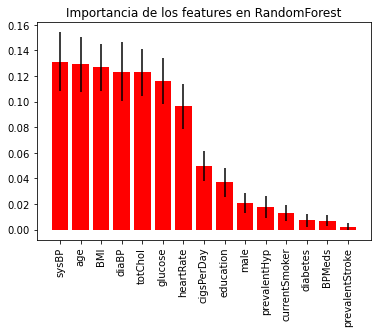

In [37]:
plt.figure()
plt.title("Importancia de los features en RandomForest")
x_values = range(data_to_plot.shape[0])
y_values = data_to_plot.importance
y_err = data_to_plot.error
plt.bar(x_values, y_values, color="r", align="center", yerr=y_err )
plt.xticks(x_values, data_to_plot.feature, rotation=90)
plt.show()

## Referencias 

Cross Validation
https://scikit-learn.org/stable/modules/cross_validation.html

StratifiedKFold
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold

Grid Search
https://scikit-learn.org/stable/modules/grid_search.html#grid-search

ROC
https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html#sphx-glr-auto-examples-model-selection-plot-roc-crossval-py

BaggingClassifier
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html
